211082M Alyssa Ang T3

# Exploratory Data Analysis (EDA) for PetFinder.my

### Background
PetFinder.my is one of the leading pet adoption portals in Malaysia and a non-profit organisation for animal welfare. However, in recent years, it has faced falling donations and slower adoption rates. The organisation is working on a new business model that will allow it to be more self-sutstainable and is looking at ways to increase revenue through advertising and sponsorship. The key metric for the organisation is the adoption rate, and with higher adoption rate, the organization can have continuous fresh new contents for the portal, and which in turn help to boost its revenue from sponsorship and partnership. More importantly, better adoption rate means more animals can find new home sooner. 

### Objective
Predict adoption for the pet listing and to understand what factors affect the adoption rate. With the aim to improve the adoption rate and enable more pets to find new homes sooner.

## 1. Initial analysis on Datasets

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy import stats
import seaborn.objects as so

In [2]:
# Main dataset for information on each unique pet
pets = pd.read_csv("pets_prepared.csv")

# Secondary datasets 
breeds = pd.read_csv("breed_labels.csv")
colours = pd.read_csv("color_labels.csv")
states = pd.read_csv("state_labels.csv")

In [3]:
# First five rows of each dataset
pets.head()

,PetID,AdoptionSpeed,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,...,HealthName,VaccinatedName,DewormedName,SterilizedName,BreedName,BreedBinsName,StateName,StateBinsName,ColorName,AdoptedName
0,86e1089a3,2,2,Nibble,3,299,0,1,1,7,...,Healthy,No,No,No,Tabby,Tabby,Selangor,Selangor,Black,Y
1,6296e909a,0,2,No Name Yet,1,265,0,1,1,2,...,Healthy,Not Sure,Not Sure,Not Sure,Domestic Medium Hair,Domestic Medium Hair,Kuala Lumpur,Kuala Lumpur,Black,Y
2,3422e4906,3,1,Brisco,1,307,0,1,2,7,...,Healthy,Yes,Yes,No,Mixed Breed,Mixed Breed,Selangor,Selangor,Brown,Y
3,5842f1ff5,2,1,Miko,4,307,0,2,1,2,...,Healthy,Yes,Yes,No,Mixed Breed,Mixed Breed,Kuala Lumpur,Kuala Lumpur,Black,Y
4,850a43f90,2,1,Hunter,1,307,0,1,1,0,...,Healthy,No,No,No,Mixed Breed,Mixed Breed,Selangor,Selangor,Black,Y


In [4]:
breeds.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [5]:
colours.head()

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream


In [6]:
states.head()

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan


In [7]:
# Review each dataset
datasets = [("pets", pets), ("breeds", breeds), 
            ("colours", colours), ("states", states)]

# Tells us more about the number of rows and columns to gauge each dataset size
print("Shape of each dataset")
print()
for name, data in datasets:
    print("Shape of {}: {}".format(name, data.shape))

Shape of each dataset

Shape of pets: (14993, 49)
Shape of breeds: (307, 3)
Shape of colours: (7, 2)
Shape of states: (15, 2)


In [8]:
# Using column names to identify features
for name, data in datasets:
    print("Features of {}\n{}\n".format(name, data.columns)) 

Features of pets
Index(['PetID', 'AdoptionSpeed', 'Type', 'Name', 'Age', 'Breed1', 'Breed2',
       'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength',
       'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee',
       'State', 'RescuerID', 'VideoAmt', 'PhotoAmt', 'Description', 'AgeBins',
       'FeeBins', 'BreedBins', 'StateBins', 'VideoAmtBins', 'PhotoAmtBins',
       'QuantityBins', 'BreedPure', 'ColorAmt', 'NameorNO', 'Adopted',
       'TypeName', 'GenderName', 'MaturitySizeName', 'FurLengthName',
       'HealthName', 'VaccinatedName', 'DewormedName', 'SterilizedName',
       'BreedName', 'BreedBinsName', 'StateName', 'StateBinsName', 'ColorName',
       'AdoptedName'],
      dtype='object')

Features of breeds
Index(['BreedID', 'Type', 'BreedName'], dtype='object')

Features of colours
Index(['ColorID', 'ColorName'], dtype='object')

Features of states
Index(['StateID', 'StateName'], dtype='object')



There are a total of 14993 pets in dataset, with 48 features; excluding adoption speed.
Each pet has an unique ID along with additional information such as Name, Type, Breed, Colour, etc. which are important attributes to each pet, and features that could be used for prediction. There are binned features that help simplify, and categorize such as AgeBins, BreedBins and so on. Moreover, there are secondary datasets providing more information towards breeds, colours and states, which can be meaningful or helpful later on.

In [9]:
pets.dtypes.value_counts()

object    27
int64     22
dtype: int64

All features are of either int (Age, Gender, Health, Quantity, Fee) or object type (PetID, Name, Descriptions, binned cols), some features may require preprocessing before use e.g. One-hot encoding

In [10]:
pets.describe() # Derive a comprehensive summary 

,AdoptionSpeed,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,ColorAmt,Adopted
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,...,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,2.516441,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,...,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,1.994531,0.720069
std,1.177265,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,...,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,0.768734,0.448980
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,1.000000,0.000000
50%,2.000000,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,...,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000,1.000000
75%,4.000000,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,3.000000,1.000000
max,4.000000,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,...,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,3.000000,1.000000


### Data Cleaning
Ensure data quality before exploring

In [11]:
print("Missing Values in Dataset")
print()
# Check for null values in each dataset
for name, data in datasets: 
    missingData = data.isnull().sum()
    missingCol = missingData[missingData > 0]
    if not missingCol.empty:
        print("Dataset for {}\n{}".format(name, missingCol)) 

Missing Values in Dataset

Dataset for pets
Description    12
BreedName       5
dtype: int64


In [12]:
print("Duplicated Values in each Dataset")
print()
# Check for duplicated values in each dataset
for name, data in datasets: 
    print("Dataset for {}: {}".format(name, data.duplicated().sum())) 

Duplicated Values in each Dataset

Dataset for pets: 0
Dataset for breeds: 0
Dataset for colours: 0
Dataset for states: 0


Drop columns that 
- Do not contribute towards the analysis, visualization, and model 
- Purely description-based that do not provide further information

Though, dropping columns early on is not recommended; having more features increases the dimensionality, imputation for missing values for columns that do not contribute is more resourceful, but helps focus analysis on the most relevant and informative data. Other columns that should be dropped will be dropped in feature selection after univariate and bivariate analysis

In [13]:
features_to_drop = ['PetID','RescuerID','AdoptedName', 'Name',
                    'Description', 'BreedName']
pets.drop(columns=features_to_drop, inplace=True)

Preprocessing features

In [14]:
# Set theme for graphs
sns.set_theme(style="ticks", palette="Set2")

In [15]:
# Convert to int for easier processing
def converttoInt(featureName):
    # Replace 'Y' with 1 and 'N' with 0
    pets[featureName] = pets[featureName].replace({'Y': 1, 'N': 0})
    # Change to Int type
    pets[featureName] = pets[featureName].astype(int)

In [16]:
# Convert Y/N feature data types to 1/0
converttoInt("NameorNO")
converttoInt("BreedPure")

In [17]:
pets["FurLengthName"] = pets["FurLengthName"].replace({"Small":"Short"})

In [18]:
# "2" has missing field "3"
pets["AgeBins"] = pets["AgeBins"].replace('2', '[ 2, 3)')
print("Values of AgeBins")
print(pets["AgeBins"].unique())

Values of AgeBins
['[  3,  6)' '[  0,  2)' '[ 12, 24)' '[ 2, 3)' '[ 60,255]' '[  6, 12)'
 '[ 24, 60)']


Look at distributions for outliers, and skew

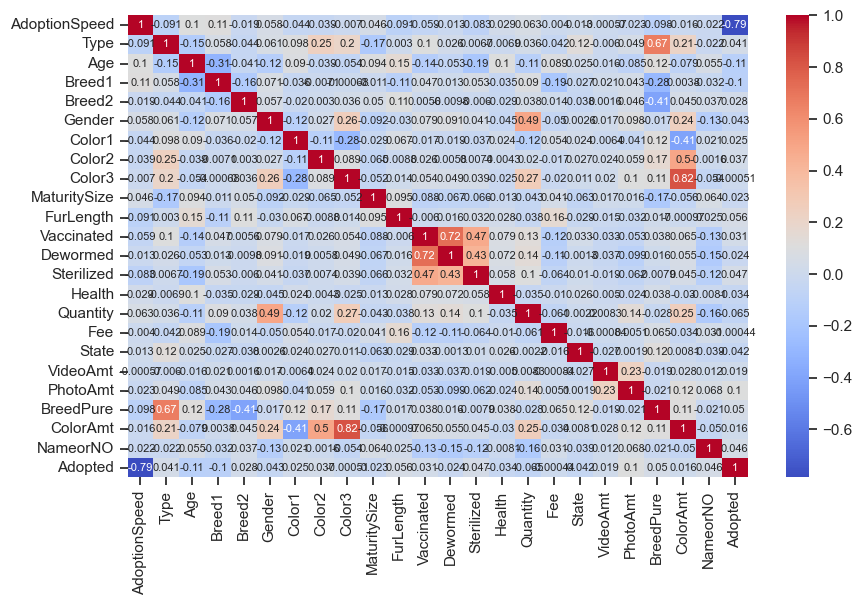

In [19]:
# Plot a correlation map to visualize pairwise relationships
corr = pets.corr(numeric_only=True)

# Plot the correlation map
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.show()

Though correlation does not mean causation, identifying strong correlations between features can provide insights into potential relationships that can be further explored.

Looking at this correlation map, it can be seen that the relationship between

- AdoptionSpeed and Age, and Breed1 is positive at 0.1 which could mean slightly faster adoption for certain ages of a certain breed.
- Minimal correlation with other features which suggests AdoptionSpeed is influenced by a mix of features
- Health and Age are somewhat correlated (0.1)
- Vaccination has slight correlation with Type, Gender, and Health. With negative correlation with AdoptionSpeed and NameorNO, suggesting vaccinated pets are less likely to be adopted faster, and less likely to have names.
- Certain genders are less likely to have names, and older pets are more likely to be named
- Strong correlation between PhotoAmt and VideoAmt
- BreedPure has a strong correlation with Type, slight positive correlation with Age, and slight negative correlation with AdoptionSpeed which mixed breeds are less likely to be adopted
- Type does not have a very strong correlation with AdoptionSpeed (0.091)

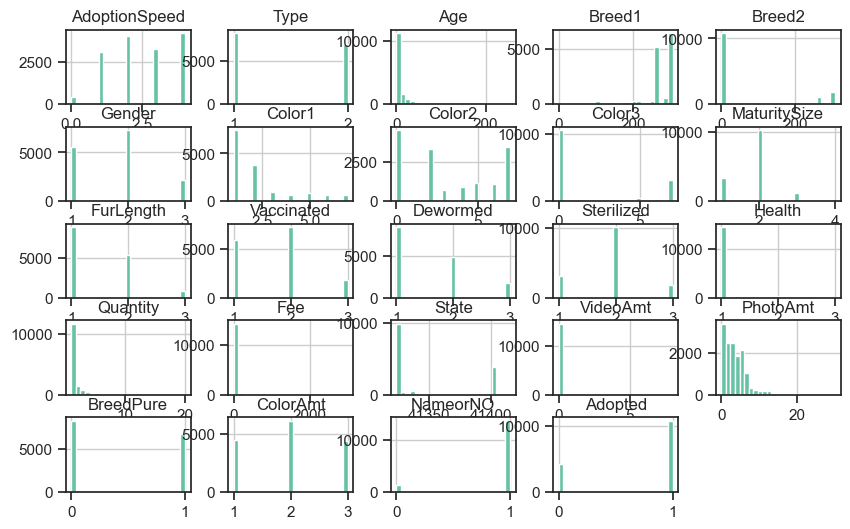

In [20]:
# Shows overall distibution of each column
pets.hist(bins=25,figsize=(10,6)) # Plot histogram
plt.show()

Can be seen that generally, the features are not highly skewed in nature, with distribution of values are relatively distributed and few data points occurring in the tails of the distribution. Age is very skewed, due to the nature of counting age in Months which causes larger variability, and that there is a lot of pets. 

## 2. Univariate analysis
Individual analysis on attributes in Pets

In [21]:
def calculate_univariate_percentages(df, x):
    # Calculate total counts for each unique value in column x
    totalCounts = df[x].value_counts().to_dict()
    
    # Calculate percentages
    total_rows = len(df)
    percentages = {k: (v / total_rows) * 100 for k, v in totalCounts.items()}
    
    # Print percentages
    for k, v in percentages.items():
        print(f'{k}: {v:.2f}%')

def calculate_pairwise_percentages(df, x, hue):
    # Calculate total counts for each unique value in x (BreedPure) and hue (TypeName)
    counts = df.groupby([hue, x]).size().unstack(fill_value=0)
    
    # Calculate percentages for each category in hue (TypeName)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100
    
    return percentages

In [22]:
def setTitleLabels(title, xlabel, ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [23]:
# Plots histograms and annotates with counts accordingly
def plotHist(df, x, hue, title, xlabel, ylabel, remove_legend=True):
    # Plot barplots
    plt.figure(figsize=(6, 2))
    ax = sns.histplot(data=df, x=x, hue=hue, 
                      multiple="dodge", palette="pastel", label="legend")
    
    # Calculate values manually
    totalCounts = df[hue].value_counts().to_dict()
    
    # Annotate each bar
    for patch in ax.patches:
        height = patch.get_height()
        if height > 0:  # Only annotate bars with a height greater than 0
            ax.annotate(f'{height:.0f}', 
                        xy=(patch.get_x() + patch.get_width() / 2, height), 
                        xytext=(0, 5),  # 5 points vertical offset
                        textcoords="offset points", 
                        ha='center', va='bottom', fontsize=10, color='black', weight='bold')

    # Set the title and labels
    setTitleLabels(title, xlabel, ylabel)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a faint grid for readability 
    ax.set_ylim(0, max(df[hue].value_counts()) + 1000)
    if remove_legend:
        ax.legend().remove()
    plt.show()

In [24]:
# Plots BoxPlots
def plotBoxPlot(df, x, y, hue, title, xlabel, ylabel):
    # Create boxplot
    plt.figure(figsize=(5, 3))
    ax = sns.boxplot(data=df, x=x, y=y, hue=hue, width=0.5)
    if hue is not None:
        plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
        
    # Add labels and title
    setTitleLabels(title, xlabel, ylabel)
    plt.show()

### Distribution of Type of Pets

In [25]:
# Create cat and dog specific dataframes
df_cats = pets[pets.TypeName=="Cat"]
df_dogs = pets[pets.TypeName=="Dog"]

In [26]:
calculate_univariate_percentages(pets, "TypeName")

Dog: 54.24%
Cat: 45.76%


Based on the percentages, there is a relatively balanced distribution, suggesting that there is an equal amount of Cats (45.7%) and Dogs (54.2%), could it mean that both are equally popular in adoption?

### Distribution of AdoptionSpeed

In [27]:
adoptionspeed_map = {0:'Same Day', 
                     1:'1-7 days', 
                     2:'8-30 days', 
                     3:'31-90 days', 
                     4: '>100 days'}

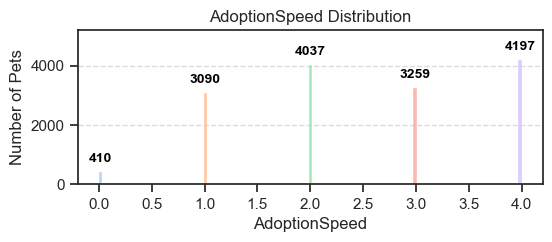

4: 27.99%
2: 26.93%
3: 21.74%
1: 20.61%
0: 2.73%


In [28]:
plotHist(pets, "AdoptionSpeed", "AdoptionSpeed","AdoptionSpeed Distribution", 
         "AdoptionSpeed", "Number of Pets")
calculate_univariate_percentages(pets, "AdoptionSpeed")

From this distribution, it can be deduced that it is very rare for pets to be adopted on the same day as its listing as it has the lowest percentage, sitting at 2.7%.  Collectively adoption speeds 1, 2, 3, and 4, makes up about 97% of the overall dataset. With adoption speed 4 being the most common; sitting at ~27.9%, and speed 2 being the second most common at ~26.9%.

### Distribution of Ages

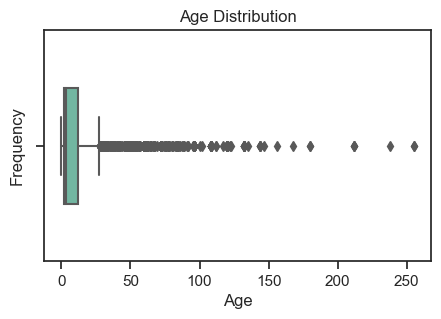

count    14993.000000
mean        10.452078
std         18.155790
min          0.000000
25%          2.000000
50%          3.000000
75%         12.000000
max        255.000000
Name: Age, dtype: float64

In [29]:
plotBoxPlot(pets,"Age",None,None,"Age Distribution","Age","Frequency")
pets["Age"].describe()

The average age of pets is 10 months, and with the standard deviation sitting at 18.155 indicates a wide spread in the values as can be seen that the 75th percentile is at 12 months; however, the oldest pet is 255 months old. 
This does indicate that most pets in the list are young pets below 12 months.
Futher seen in the boxplot, it can be seen that there are many and extreme outliers.

## 3. Bivariate and Multivariate analysis

In [30]:
# Plot correlation map with specific datasets, and columns
def plotCorrMap(df, cols, title, ax):
    # Choose specific features to correlate
    corr = df[cols].corr(numeric_only=True)

    # Plot the correlation map
    plt.figure(figsize=(5,3))
    sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 10}, ax=ax)
    ax.set_title(f"Correlation Map: {title}")

In [31]:
# Plot stacked bar plot
def plotStacked(df, index, col, mapping, title, xlabel, ylabel):
    Counts = df.groupby([index,col]).size().reset_index(name='Count')

    pivotData = Counts.pivot(index=index, columns=col, values='Count')

    # Normalize the data to percentage
    pivotData = pivotData.div(pivotData.sum(axis=1), axis=0) * 100

    # Create a stacked bar plot
    plt.figure(figsize=(3,1))

    labels = mapping.values()
    ax = pivotData.plot(kind='bar', stacked=True)

    # Set the labels and title
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    setTitleLabels(title, xlabel, ylabel)

    # Set the y-axis tick format to show percentages
    ax.yaxis.set_major_formatter(PercentFormatter())
    ax.set_ylim(0, 100)
    # Set the legend outside the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [32]:
def getCounts(df, var1, var2, var3):
    data = df[df[var1] == var2][var3]
    count = data.value_counts()
    return count

In [33]:
# Creates a co-tabluation table for cat and dog specific relationships
def coTabulation(title,x,y):
    print(title)
    print("Co-tabulation for Cats")
    print(calculate_pairwise_percentages(df_cats, x, y))
    print()
    print("Co-tabulation for Dogs")
    print(calculate_pairwise_percentages(df_dogs, x, y))

In [34]:
# Manually calculate percentages to be annotated in countplot
def show_percentage(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12, ha='center')

In [35]:
# Plot two bargraphs to be placed side-by-side
def plot2Count(x, df1, df2, hue1, hue2,
               title1, title2, mainTitle):
    # Plot two graphs
    fig, axs = plt.subplots(1, 2, figsize=(8, 3))
    
    # Plot the first graph
    sns.countplot(x=x, data=df1, hue=hue1, ax=axs[0])
    axs[0].set_title(title1)
    show_percentage(axs[0], df1)
    axs[0].legend_.remove()

    # Plot the second graph
    sns.countplot(x=x, data=df2, hue=hue2, ax=axs[1])
    axs[1].set_title(title2)
    show_percentage(axs[1], df2)

    # Adjust layout
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.suptitle(mainTitle, y=1.05)
    plt.show()

### Correlation Map for Health
Correlated with other health features? Does it impact AdoptionSpeed?

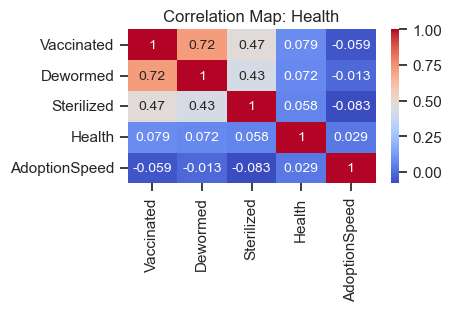

<Figure size 500x300 with 0 Axes>

In [36]:
# Plot correlation map
columns = ['Vaccinated', 'Dewormed','Sterilized', 'Health', 'AdoptionSpeed']
fig, axs = plt.subplots(1, 1, figsize=(4, 2))
plotCorrMap(pets, columns, "Health", axs)
plt.show()

'Vaccinated', 'Dewormed','Sterilized' have strong correlation with each other.
Generally, not very strong correlation with AdoptionSpeed. However, negative correlations for 'Vaccinated', 'Dewormed','Sterilized' suggests that pets who have not been to gotten jabs are likely to be adopted slower.

### Relationship between Cat and Dog and more features

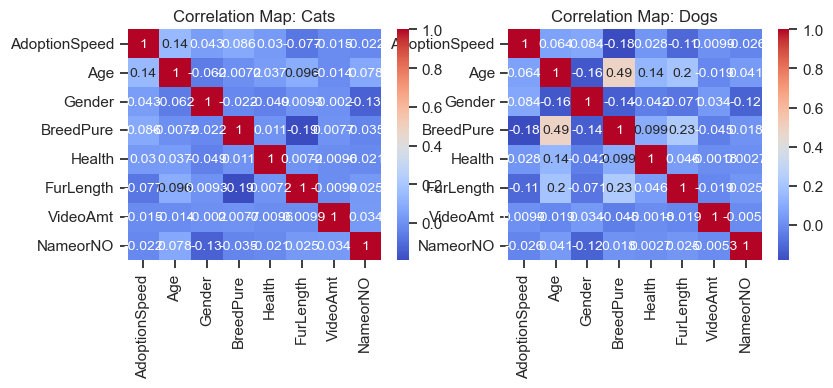

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

In [37]:
# Choose columns to find correlation
columns = ["AdoptionSpeed","Age","Gender","BreedPure","Health",
           "FurLength","VideoAmt","NameorNO"]
fig, axs = plt.subplots(1, 2, figsize=(9, 3))
# Plot for cat and dogs
plotCorrMap(df_cats, columns, "Cats", axs[0])
plotCorrMap(df_dogs, columns, "Dogs", axs[1])

plt.show()

For both Cats and Dogs
- Have positive correlation between Age and Adoption Rate, however, Cats (0.143) have a higher correlation than Dogs (0.064) means older cats are likely to have slower adoption rate
- Gender has a slight influence, where cats have a weaker correlation (0.043) and Dogs have higher (0.084)
- Weak negative correlation between AdoptionSpeed and NameorNO, which could suggest a pet having a name or not does not significantly impact the AdoptionSpeed. -0.022 and -0.026 for Cats and Dogs respectively
- FurLength has a strong correlation for AdoptionSpeed in both Cats (0.077) and Dogs (0.11)

For Dogs
- Strong correlation between Age and BreedPure (0.49) suggesting older dogs are likely pure bred

### Relationship between AdoptionRate and Type

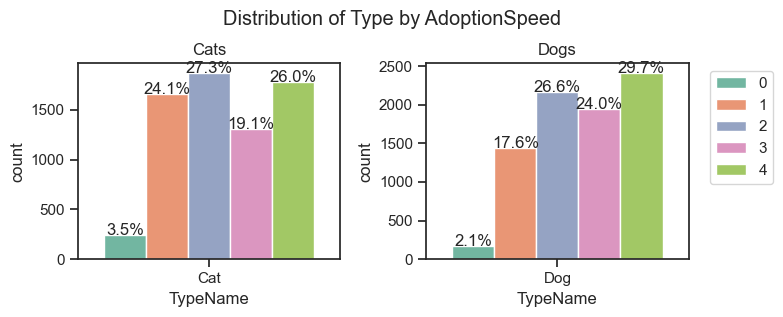

In [38]:
plot2Count("TypeName", df_cats, df_dogs, "AdoptionSpeed", "AdoptionSpeed", 
           "Cats", "Dogs", "Distribution of Type by AdoptionSpeed")

From the countplot, it can be seen that cats have a higher percentage of being adopted within the first month, and lower percentage for being unadopted. Dogs show a higher percentage of adoptions taking more than 90 days compared to cats, and a slightly higher percentage of being unadopted after 100 days (3.7%). Generally, not a very big difference suggesting type is not a big factor.

### Relationship between BreedPure and Type

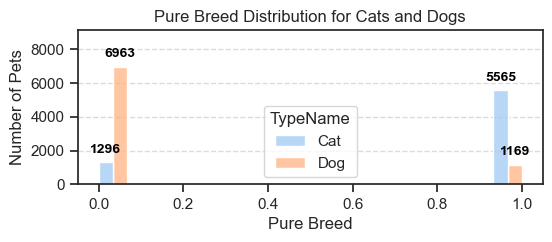

In [39]:
# 0 for not and 1 for pure breed
plotHist(pets, "BreedPure", "TypeName",
         "Pure Breed Distribution for Cats and Dogs", 
         "Pure Breed", "Number of Pets", False)

Generally there is not much difference between BreedPure and AdoptionSpeed (~10% in difference), mostly affecting adoption speed 3 and 4 ( ~20% in difference)

In [40]:
# Look at the difference in AdoptionSpeeds between Cat and Dog
coTabulation("Relationship between AdoptionSpeed and BreedPure",
             "AdoptionSpeed","BreedPure")

Relationship between AdoptionSpeed and BreedPure
Co-tabulation for Cats
AdoptionSpeed         0          1          2          3          4
BreedPure                                                          
0              6.095679  26.929012  28.240741  19.753086  18.981481
1              2.893082  23.468104  27.079964  18.939802  27.619048

Co-tabulation for Dogs
AdoptionSpeed         0          1         2          3          4
BreedPure                                                         
0              1.665949  15.280770  26.41103  24.558380  32.083872
1              4.619333  31.736527  27.80154  20.444825  15.397776


Pure bred Cats and Mixed Breed Dogs are more similar, and likewise for Pure bred Dogs and Mixed Breed Cats. Cats generally have quite equal percentages between Pure and Mixed, other than for AdoptionSpeed 0 and 4. Dogs have more varying percentages, with the highest percentage of AdoptionSpeed 4 for Mixed Breeds (32.0%).

### Relationship between Gender, Type and AdoptionSpeeds

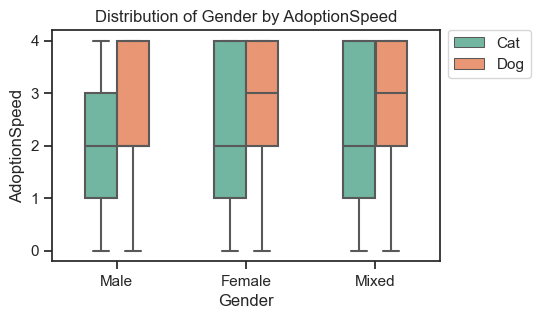

In [41]:
plotBoxPlot(pets,"GenderName","AdoptionSpeed","TypeName",
            "Distribution of Gender by AdoptionSpeed",
            "Gender","AdoptionSpeed")

Can be seen that generally, Male cats are more preferred compared to Dogs, the median for Male, Female and Mixed are at AdoptionSpeed 2, 25th percentile is sitting at AdoptionSpeed 1 meaning regardless of Gender, Cats are adopted faster than Dogs. Dogs generally have the same distribution between Male, Female and Mixed, however, the median for Male dogs is 4.

In [42]:
coTabulation("Relationship between Gender distribution and AdoptionSpeed",
             "AdoptionSpeed","GenderName")

Relationship between Gender distribution and AdoptionSpeed
Co-tabulation for Cats
AdoptionSpeed         0          1          2          3          4
GenderName                                                         
Female         3.900826  23.008264  27.206612  19.041322  26.842975
Male           3.476887  25.404978  28.921375  18.411695  23.785065
Mixed          2.605364  24.214559  24.367816  20.536398  28.275862

Co-tabulation for Dogs
AdoptionSpeed         0          1          2          3          4
GenderName                                                         
Female         2.022578  15.757291  25.587959  25.752587  30.879586
Male           2.396007  21.297837  28.153078  21.397671  26.755408
Mixed          1.371429  14.285714  26.285714  24.114286  33.942857


Male Cats and Dogs have the lowest percentages for adoption speed 4 23.8% and 26.8% respectively. Mixed pets have the highest percentage (33.9%) for adoption speed 4. Generally, male pets have a higher likelihood of being adopted within a month, and Mixed pets have slower adoption rates.

### Relationship between FurLength, and AdoptionSpeed

1 = Short, 2 = Medium, 3 = Long

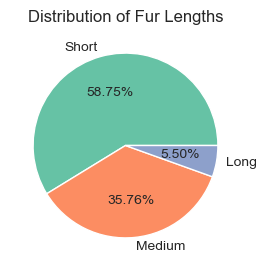

In [43]:
# Get counts
furCount = pets['FurLengthName'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 3))
plt.pie(furCount, labels=furCount.index,
        autopct='%1.2f%%',textprops={'fontsize': 10})
# Add title
plt.title('Distribution of Fur Lengths')

# Show the plot
plt.show()

Most pets are short-haired. Would mean short-haired pets are more likely to be adopted faster?

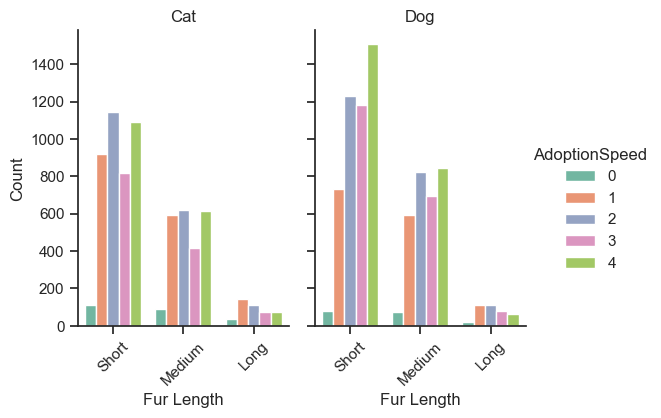

In [44]:
catplot = sns.catplot(data=pets, x='FurLengthName', hue='AdoptionSpeed', 
                      col='TypeName', kind='count', height=4, aspect=0.7, dodge=True)

# Adjust layout and show the plot
catplot.set_titles("{col_name}")
catplot.set_axis_labels("Fur Length", "Count")
catplot.set_xticklabels(rotation=45)
plt.show()

Short-haired pets have the highest likelihood to be unadopted, long haired pets are more likely to be adopted the quickest within the first month. Short and Medium haired pets have generally the same percentages, with Medium fairing slightly better.

### Relationship between Type, Age and AdoptionSpeed
The younger the pet, the more likely to be adopted? Younger cats are more likely to be adopted?

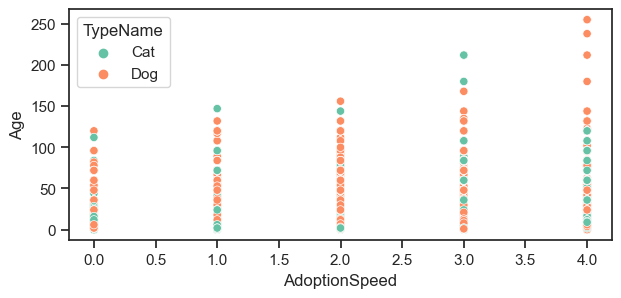

In [45]:
plt.figure(figsize=(7, 3)) 

# Scatterplot to plot betweem relationships
sns.scatterplot(data=pets, x="AdoptionSpeed", 
                y="Age", hue="TypeName", 
                palette="Set2")
plt.show()

Can be seen that generally younger pets are more favoured due to the clustering towards younger ages, and towards the longer adoption speeds that older pets are included into the graph. Additionally that at adoption speed 4, towards age ~130 are all Dogs, and Cats are more prominently clustered as compared to the other speeds.

<Figure size 300x100 with 0 Axes>

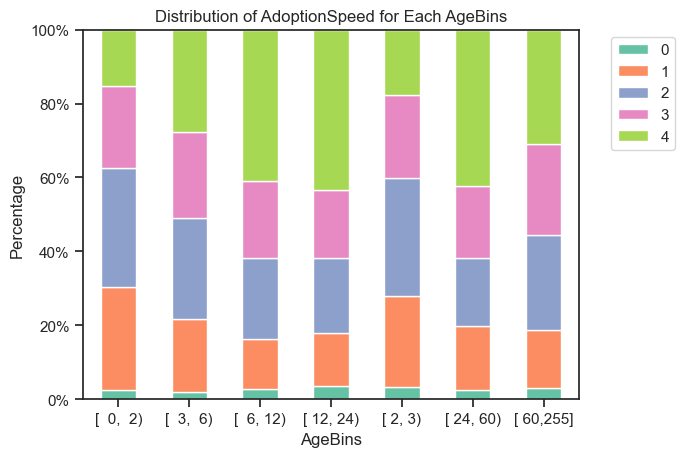

In [46]:
plotStacked(pets, 'AgeBins', 'AdoptionSpeed',adoptionspeed_map,
            "Distribution of AdoptionSpeed for Each AgeBins", 
            "AgeBins","Percentage")

Can be seen that there is a general trend where as the pet gets older, the adoption speed decreases, and the adoption speed 4 increases. Pets within 0-6 months are more preferred, with the lower percentages for adoption speed 4. Moreover, pets aged between 6-60 months old have about ~40% to be not adopted, with pets aged between 60-255 with slightly lower adoption speed 4 percentage. Concluding that younger pets aged 0-6 months are more likely to be adopted faster, and have less likelihood of being unadopted.

### Relationship between Health, and AdoptionSpeeds
The better the health, the more likely the pet will get adopted?

<Figure size 300x100 with 0 Axes>

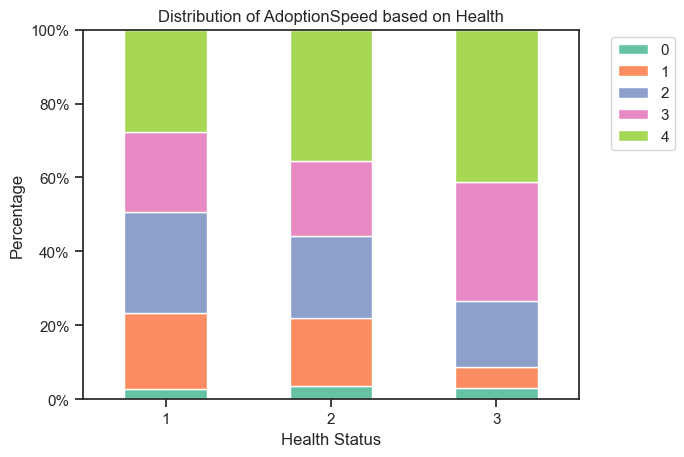

AdoptionSpeed,0,1,2,3,4
Health,,,,,
1,2.707556,20.714187,27.110098,21.757149,27.711010
2,3.534304,18.503119,22.037422,20.374220,35.550936
3,2.941176,5.882353,17.647059,32.352941,41.176471


In [47]:
plotStacked(pets, 'Health', 'AdoptionSpeed',adoptionspeed_map,
            "Distribution of AdoptionSpeed based on Health", 
            "Health Status","Percentage")
calculate_pairwise_percentages(pets, "AdoptionSpeed", "Health")

Healthy pets are highly likely to get adopted (72.3%) compared to minor (64.4%) or serious injury pets (58.8%). Healthy pets are also more likely to be adopted within the first month. Moreover, seriously injured pets have the highest AdoptionSpeed 4 (41.1%) but highest AdoptionSpeed 3 (32.3%), however, overall the least likely to be adopted fast.

Since health is correlated with 'Vaccinated','Dewormed', 'Sterilized', these could be important features.

## 4. Data Transformations

### Feature engineering and selection

In [48]:
# Create 'FreeorNO' column based on 'Fee'
# 1 for free and 0 for paid
pets['FreeorNO'] = pets['Fee'].apply(lambda x: 1 if x == 0 else 0)

In [49]:
# Create 'VideoorNO' column based on 'VideoAmt'
# 1 for video and 0 for none taken
pets['VideoorNO'] = pets['VideoAmt'].apply(lambda x: 1 if x > 0 else 0)

In [50]:
features_to_drop = ['Breed1','Breed2','Fee','VideoAmt','FurLength', 'MaturitySize',
                    'Type', 'Vaccinated', 'Dewormed', 'Sterilized',
                    'Health', 'Gender','Color1', 'Color2','Color3', 'Adopted',
                    'FeeBins','StateName','Age','VideoAmtBins','PhotoAmt','State']
pets.drop(columns=features_to_drop, inplace=True)

In [51]:
pets.columns

Index(['AdoptionSpeed', 'Quantity', 'AgeBins', 'BreedBins', 'StateBins',
       'PhotoAmtBins', 'QuantityBins', 'BreedPure', 'ColorAmt', 'NameorNO',
       'TypeName', 'GenderName', 'MaturitySizeName', 'FurLengthName',
       'HealthName', 'VaccinatedName', 'DewormedName', 'SterilizedName',
       'BreedBinsName', 'StateBinsName', 'ColorName', 'FreeorNO', 'VideoorNO'],
      dtype='object')

# Conclusion

Through the EDA, relationships and correlations could be uncovered, allowing impactful insights to be made towards understanding customer's preferences and likes, which can result in a better business model and helping the pets be adopted faster.

- Most features have low correlation with AdoptionSpeed due to the nature of having many different features and attributes to factor in. 
- Features that have stronger correlation with AdoptionSpeed are Age, Breed1, Health, Quantity, Health, Furlength, etc are more defining features that influence AdoptionSpeed 
- 'Vaccinated', 'Dewormed','Sterilized', are positively correlated with each other
- Assume that Young Female Pure Bred Long-haired Cats with good health and have been sterilized would be adopted the quickest

In [53]:
pets.to_csv("transformedPets",index=False)